In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Let's model how heat distributes
TODO:
- [x] Model simple 1d case
- [ ] Add 'heater': non-uniform eq
- [ ] Add some nice math theory formulas via latex
- [ ] Calculate convergence and warn if parameters are non convergent
- [ ] Use some other diff scheme

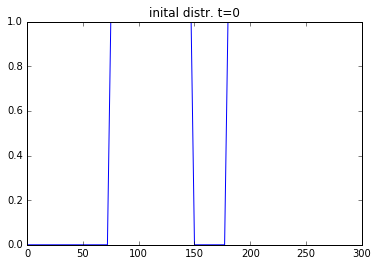

In [450]:

x_size = 100  # dim size
t_steps = 300   # time dim size
dx = 3
dt = 0.1
D =  3 #diff coef
# init func via Heaviside
U0 = np.zeros(x_size-1)
U0[x_size//4:] = 1.
U0[x_size//2:x_size//2+10]=0.

#init 'heater'
H = np.zeros(x_size)
H[x_size//2:x_size//2+10]=2.

plt.plot(dx*np.arange(x_size-1),U0)
plt.title('inital distr. t=0')
plt.show()

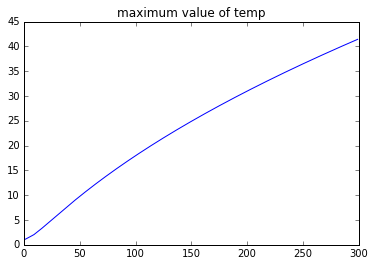

In [458]:
# init with U0
U_ti = U0
U = [U_ti]
maxs = [max(U_ti)]

for ti in range(1,t_steps):
    U_next = []
    U_ti = np.concatenate(([U_ti[-1]], U_ti, [U_ti[0]] ))    
    for xi in range(1,x_size):
        # pad torus-like
        # step!
        tt = dt/dx* D*( U_ti[xi-1] - 2*U_ti[xi] +U_ti[xi+1] ) + U_ti[xi] + dt*H[xi]
        U_next.append(tt)
    U_ti = np.array(U_next)
    maxs.append(max(U_ti))

    #print(max(U_ti),U_ti.shape)
    U.append(U_ti)
plt.plot(maxs)
plt.title('maximum value of temp')
    

In [459]:
U = np.array(U)
print(U)

[[0.         0.         0.         ... 1.         1.         1.        ]
 [0.1        0.         0.         ... 1.         1.         0.9       ]
 [0.17       0.01       0.         ... 1.         0.99       0.83      ]
 ...
 [0.47484642 0.42388559 0.37440751 ... 0.62754626 0.5775742  0.52638086]
 [0.47490378 0.42403386 0.37464238 ... 0.62734346 0.57745207 0.52634675]
 [0.47496108 0.42418171 0.3748765  ... 0.62714173 0.57733068 0.52631298]]


(300, 99)


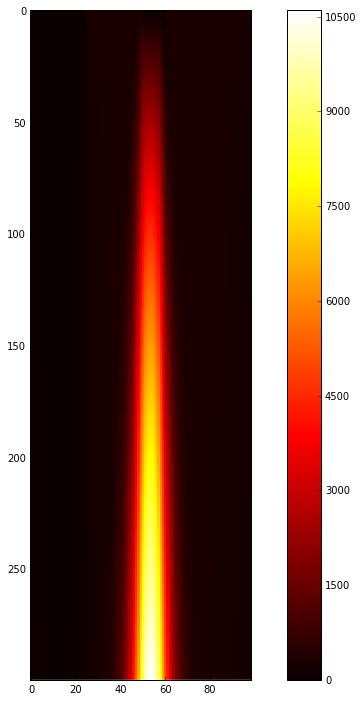

In [460]:
U=np.array(U*256)
print(U.shape)
f,ax = plt.subplots(1,1,figsize=(13,12))
ff = ax.imshow(U.astype(np.int),cmap='hot',interpolation='none')
f.colorbar(ff,ax=ax)
